<a href="https://colab.research.google.com/github/rharkovsky/pucCienciadeDados/blob/main/MVP1_Harkovsky1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise Exploratória de Dados 

## ROBERTO HARKOVSKY

### Base Netlix

## 1. Definição do Problema

O dataset usado neste projeto será o NetflixOriginals, proveniente originalmente do Kagle. Este dataset consiste em todos os filmes originais da Netflix lançados em 1º de junho de 2021. Além disso, também inclui todos os documentários e especiais da Netflix. Seu objetivo é apresentar as características do filme e sua classificação IMDB que mede a receptividade do público. O score do IMDB são obtidos através de votação dos membros da comunidade. Além disto a maioria dos filmes tem mais de 1.000 críticas. As variáveis preditoras incluem gênero do filme, tempo de execução, IMDB e linguagem. Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores 


1.	Title - Título do filme
2.	Genre - Gênero do filme
3.	Premiere - Data de estreia original
4.	Runtime - Tempo de execução em minutos
5.	IMDB Score - Pontuações do IMDB (a partir de 01/06/21)
6.	Language - Idiomas atualmente disponíveis (a partir de 01/06/21)


## 2. Carga de dados


### Importando Biliotecas

In [51]:
# imports
import pandas as pd
import numpy as np
import missingno as ms 

import matplotlib.pyplot as plt
import seaborn as sns

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# conexão com GDrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### *Preparando o Dataset*

In [52]:
# url a importar
arquivo = "NetflixOriginals.csv"
url_dados = "/content/gdrive/MyDrive/datasets/" + arquivo


# carga do dataset através do csv
ds = pd.read_csv(url_dados, delimiter=',', encoding='ISO-8859-1')

# verifica o tipo
print(type(ds))

# exibe as 5 primeiras linhas
ds.head()

<class 'pandas.core.frame.DataFrame'>


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


## 3. Análise Exploratória de Dados

### 3.1. Estatísticas Descritivas
Verificando o dimensões do Dataset e possiveis ocorrencias de missings e linhas duplicadas.

In [36]:
# Dimensões do dataset
print(f'*** Dimensões do dataset ***\n')
print(ds.shape)


*** Dimensões do dataset***

(584, 6)


O dataset possui 6 colunas com 584 linhas

In [31]:
# Mostra as informações do dataset
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
None


Do total de 6 variaveis, existem 4 object, 1 int e 1 float

In [27]:
# exibe as 10 primeiras e 10 últimas linhas
display(ds.head(10))
display(ds.tail(10))

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


,Title,Genre,Premiere,Runtime,IMDB Score,Language
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English




---


**Resumo do dataset**

*   Temos 6 colunas com 584 linhas
*   Existem 4 variáveis object, 1 int e 1 float



---



Gerando um sumário estatistico do dataset dos campos IMDB e Runtime


In [35]:
# exibindo um sumário estatístico
display(ds.describe())

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000




---


**Resumo da análise estatística**

*   Temos 6 colunas com 584 linhas
*   Existem 4 variáveis object, 1 int e 1 float
*   A pontuação mínima do IMDB é 2,5 e a máxima é 9,0
*   O tempo de execução mínimo é de 9 minutos e o máximo é de 209 minutos.


---



### 3.2. Visualizações Unimodais

Criando um histograma para cada atributo do dataset. 

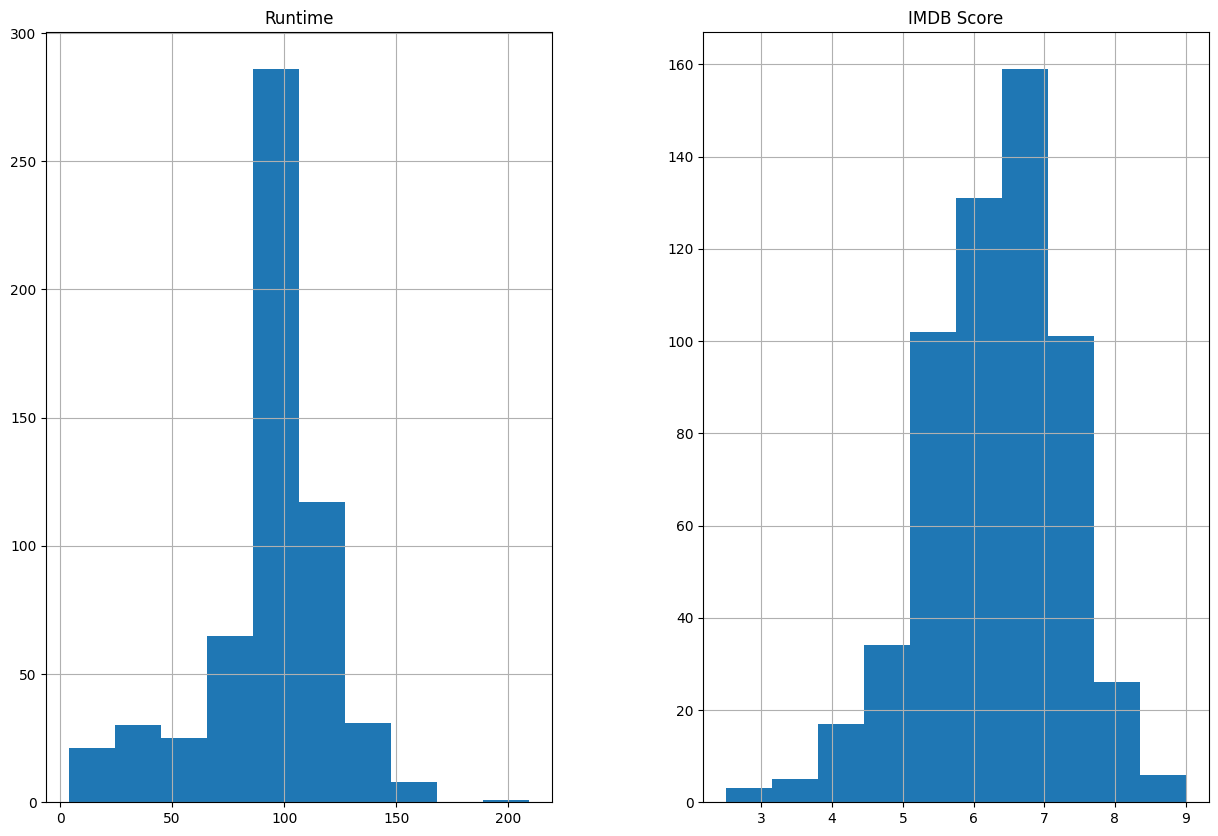

In [48]:
# Histograma
ds.hist(figsize = (15,10))
plt.show()

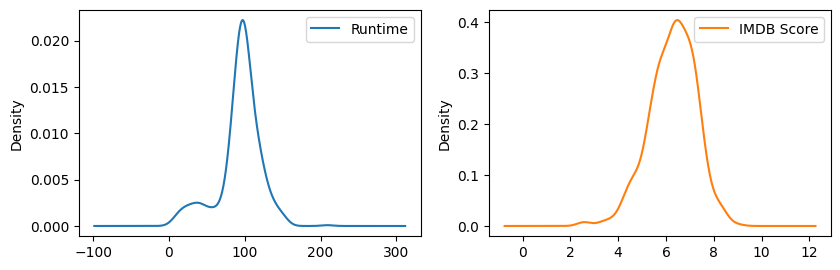

In [45]:
# Density Plot
ds.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

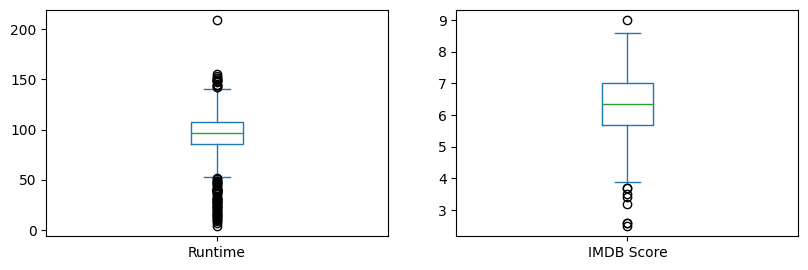

In [50]:
# Boxplot
ds.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### 3.3. Visualizações Multimodais

Medindo a correlação entre as variaveis

<ipython-input-53-b5b8dd4a79d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(), annot=True, cmap='RdBu');


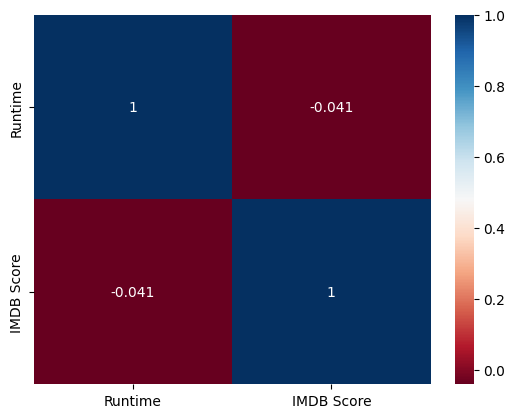

In [53]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(ds.corr(), annot=True, cmap='RdBu');



---


**Resumo da análise de correlação de variáveis**

*  Não há correlação entre o tempo de exibição (Runtime) e a nota (IMDB)


---



## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook.

### 4.1. Tratamento de Missings e Limpeza

Avaliando a ocorrencia de nulls e/ou linhas duplicadas, verificando agora a quantidade de linhas preenchidas por coluna, número de valores nulls e ocorrencia de duplicidad

In [54]:
# exibindo a quantidade de linhas por coluna
print(f'\n*** Quantidade de linhas por coluna ***')
print(ds.count())

# Checando número de valores nulls nas colunas
print(f'\n*** Valores Nulos ***')
print(ds.isnull().sum())
print(f'\n*** Linhas duplicadas ***')
print(ds.duplicated().sum())


*** Quantidade de linhas por coluna ***
Title         584
Genre         584
Premiere      584
Runtime       584
IMDB Score    584
Language      584
dtype: int64

*** Valores Nulos ***
Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

*** Linhas duplicadas ***
0


Certificando visualmente atraves de grafico a ocorrencia de Missings



In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
#col = list(ds.columns)

# o novo dataset irá conter todas as colunas do dataset original
#dsNoMiss = ds[col[:]]

# substituindo os zeros por NaN
#dsNoMiss.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds)



---


**Resumo da análise de Missing e duplicatas**

*   Não há valor nulo no conjunto de dados.
*   Não há variáveis duplicadas


---



### 4.2 Covertendo variavel Premiere

In [57]:
# Converted panda Series type of column "Premiere" to date format
ds["Date"] = pd.to_datetime(ds.Premiere)

# Created a column representing days called "Day"
ds['Day'] = ds['Date'].dt.day_of_week 

# Created a column representing months called "Month"
ds['Month'] = ds['Date'].dt.month

# Created a column representing years called "Year"
ds['Year'] = ds['Date'].dt.year 

# Removed the "Premiere" column which is no longer needed.
ds.drop("Premiere", axis=1, inplace=True)

# Previewing first 10 rows after the changes
ds.head(10)

,Title,Genre,Runtime,IMDB Score,Language,Date,Day,Month,Year
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019-08-05,0,8,2019
1,Dark Forces,Thriller,81,2.6,Spanish,2020-08-21,4,8,2020
2,The App,Science fiction/Drama,79,2.6,Italian,2019-12-26,3,12,2019
3,The Open House,Horror thriller,94,3.2,English,2018-01-19,4,1,2018
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020-10-30,4,10,2020
5,Drive,Action,147,3.5,Hindi,2019-11-01,4,11,2019
6,Leyla Everlasting,Comedy,112,3.7,Turkish,2020-12-04,4,12,2020
7,The Last Days of American Crime,Heist film/Thriller,149,3.7,English,2020-06-05,4,6,2020
8,Paradox,Musical/Western/Fantasy,73,3.9,English,2018-03-23,4,3,2018
9,Sardar Ka Grandson,Comedy,139,4.1,Hindi,2021-05-18,1,5,2021


In [58]:
# exibindo um sumário estatístico
display(ds.describe())

,Runtime,IMDB Score,Day,Month,Year
count,584.000000,584.000000,584.000000,584.000000,584.000000
mean,93.577055,6.271747,3.392123,6.859589,2018.936644
std,27.761683,0.979256,1.130585,3.466697,1.473992
min,4.000000,2.500000,0.000000,1.000000,2014.000000
25%,86.000000,5.700000,3.000000,4.000000,2018.000000
50%,97.000000,6.350000,4.000000,7.000000,2019.000000
75%,108.000000,7.000000,4.000000,10.000000,2020.000000
max,209.000000,9.000000,6.000000,12.000000,2021.000000


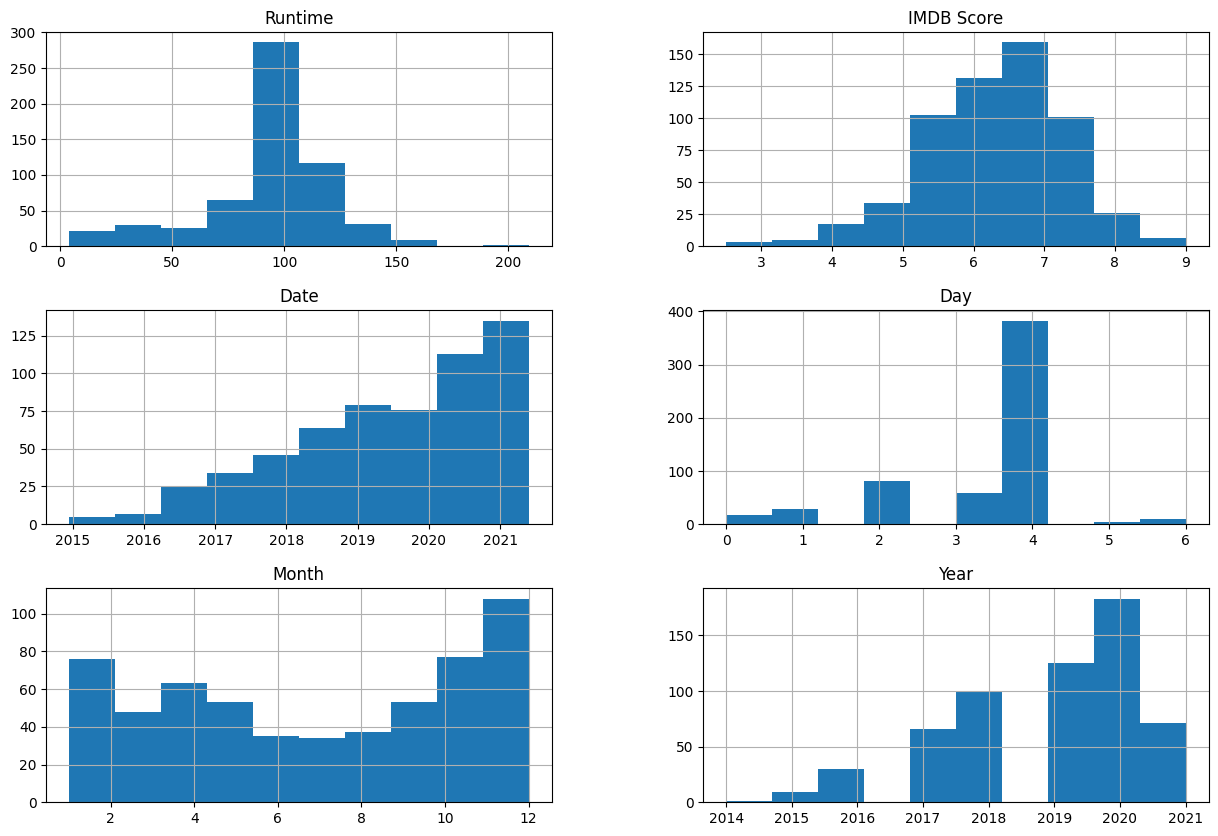

In [59]:
# Histograma
ds.hist(figsize = (15,10))
plt.show()

<ipython-input-60-b5b8dd4a79d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(), annot=True, cmap='RdBu');


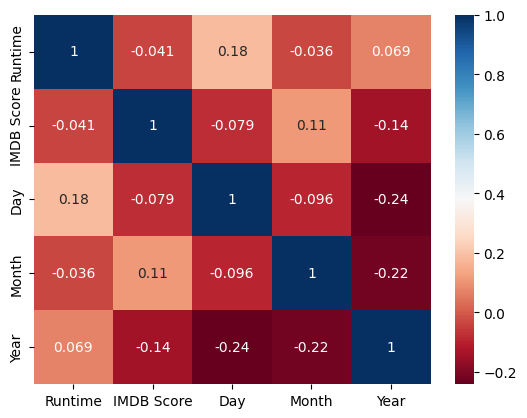

In [60]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(ds.corr(), annot=True, cmap='RdBu');

## Transformação Categórica

Iniciando a transformação das categorias em valores numericos para análise

In [ ]:


# categorizando os dados não numericos
x = ds.values[:,0:6]
y = ds.values[:, 4]

# ordinal encoding para os atributos x
encoded_X = OrdinalEncoder().fit_transform(x)

# exibindo amostra dos dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas
print(y[:5])
ds.columns

**** :) Ver se da pra colorir as diferentes linguagens ****

In [ ]:
# Histograma
ds.hist(figsize = (15,10))
plt.show()



---



Text(0.5, 0, 'Language')

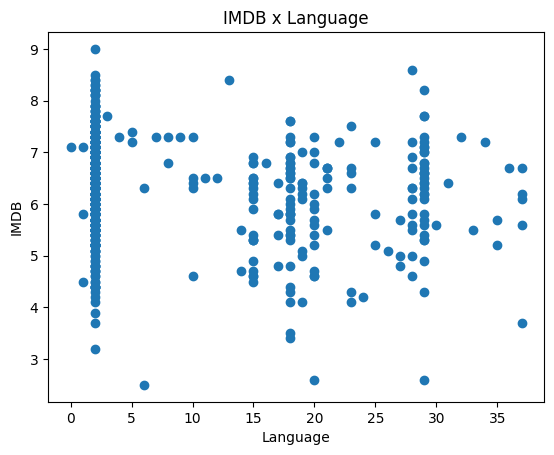

In [134]:


# plotando o gráfico 
plt.scatter(encoded_X[:,5], y)

# incluindo título do gráfico e rótulos dos eixos
plt.title('IMDB x Language')
plt.ylabel('IMDB')
plt.xlabel('Language')


In [ ]:
# importação do pyplot
import matplotlib.pyplot as plt

fig, axs  = plt.subplots(2,3)

# plotando o gráfico 
for i in range(1,6):
  for j in range(1,6):
    axs[i, j].scatter(encoded_X[:,4], encoded_X[:,i])

# incluindo título do gráfico e rótulos dos eixos
#    fig[i, j].title('IMDB x Language')
#    fig[i, j].xlabel('IMDB')
    axs[i, j].ylabel('Language')

In [ ]:
# plotando o gráfico 
plt.scatter(encoded_X[:,4], encoded_X[:,3])

# incluindo título do gráfico e rótulos dos eixos
plt.title('IMDB x Runtime')
plt.xlabel('IMDB')
plt.ylabel('Runtime')

In [ ]:
# importação do pyplot
import matplotlib.pyplot as plt

# plotando o gráfico de comprimento x largura da sépala
plt.scatter(dsSemMissings['IMDB Score'], dsSemMissings['Runtime'])

# incluindo título do gráfico e rótulos dos eixos
plt.title('IMDB x Runtime')
plt.xlabel('IMDB')
plt.ylabel('Runtime')